In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#중심점이 4개인 150개의 점데이터를 무작위 생성
points, labels = make_blobs(n_samples=150, centers=4, n_features=2,
                           random_state = 42)

#무작위로 생성된 점의 좌표 10개 출력
print(points.shape)
print(points[:10])
print(labels.shape)
print(labels[:10])

(150, 2)
[[-2.54502366 10.57892978]
 [-3.34841515  8.70507375]
 [-8.55733589  6.7008234 ]
 [ 6.52606474  2.1477475 ]
 [-6.36459192 -6.36632364]
 [-6.25395984 -7.73726715]
 [-3.18611962  9.62596242]
 [-2.97867201  9.55684617]
 [-7.35155906 -5.791159  ]
 [-7.72642091 -8.39495682]]
(150,)
[0 0 3 1 2 2 0 0 2 2]


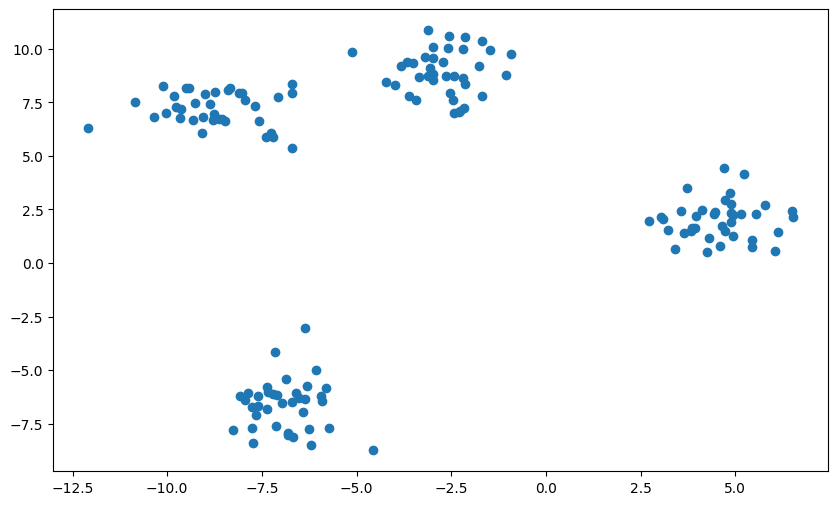

In [ ]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(111)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
points_df

axes.scatter(points_df['X'], points_df['Y'])
plt.show()

In [ ]:
centers

array([[0.1769262 , 7.24339757],
       [0.44054862, 6.45098964],
       [4.61657047, 0.07378482],
       [0.0374855 , 4.38475564]])

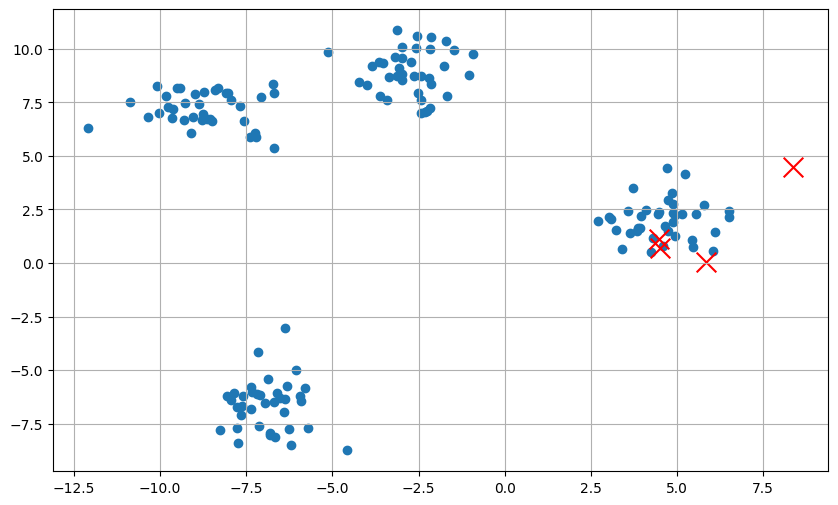

In [ ]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(111)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
points_df

#중심점 생성
centers = np.random.rand(4, 2) * 10
#0부터 1사이의 난수를 생성
axes.scatter(points_df['X'], points_df['Y'])
axes.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=200)
axes.grid()
plt.show()

# KMeans

In [ ]:
from sklearn.cluster import KMeans

k_cluster = KMeans(n_clusters=4)
k_cluster

KMeans(n_clusters=4)

In [ ]:
k_cluster.fit(points)


KMeans(n_clusters=4)

In [ ]:
print(k_cluster.labels_)
print(type(k_cluster.labels_))
print(np.shape(k_cluster.labels_))

[0 0 3 2 1 1 0 0 1 1 3 3 2 3 1 2 3 2 2 2 0 3 1 3 1 3 3 0 3 2 2 0 1 3 2 2 1
 3 1 0 2 3 0 0 1 2 0 1 0 3 2 2 2 0 0 3 2 1 3 0 3 3 1 1 1 2 1 1 2 2 3 0 2 0
 0 2 2 1 2 0 0 3 0 1 2 0 2 1 3 2 3 2 0 3 1 2 3 3 0 2 1 1 0 0 1 0 3 2 2 3 1
 2 2 3 3 2 3 1 3 0 3 3 2 3 0 1 3 1 2 3 0 0 2 1 0 1 1 1 2 3 0 0 1 1 0 0 1 0
 0 1]
<class 'numpy.ndarray'>
(150,)


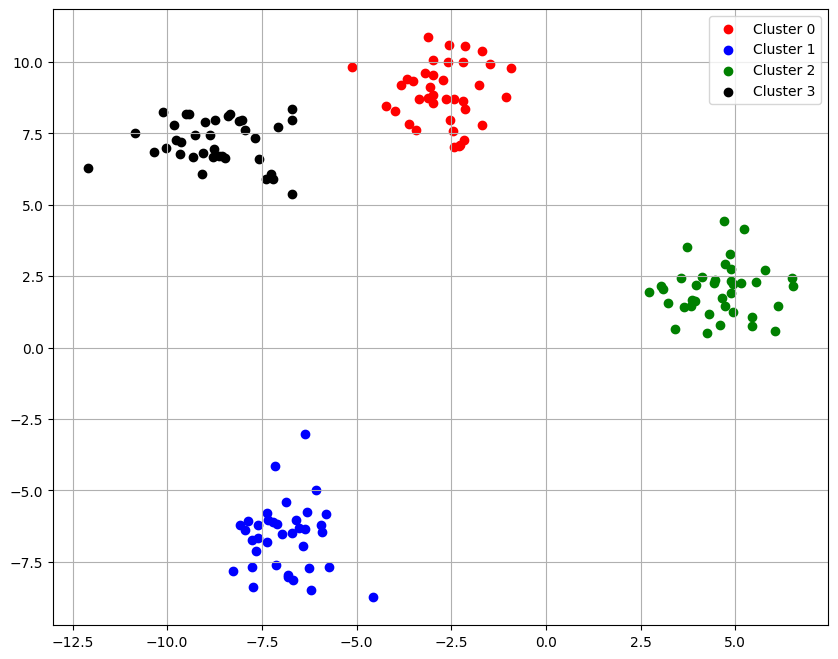

In [ ]:
color = {0:"red", 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize=(10, 8))

for cluster in range(4):
    cluster_sub = points[k_cluster.labels_ == cluster]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color[cluster],
               label=f"Cluster {cluster}")

plt.legend()
plt.grid()
plt.show()

In [ ]:
#중심점 가져오기
centers = k_cluster.cluster_centers_
centers

array([[-2.72112455,  8.91488018],
       [-6.88351291, -6.62808432],
       [ 4.5852105 ,  2.01437065],
       [-8.72609933,  7.19780028]])

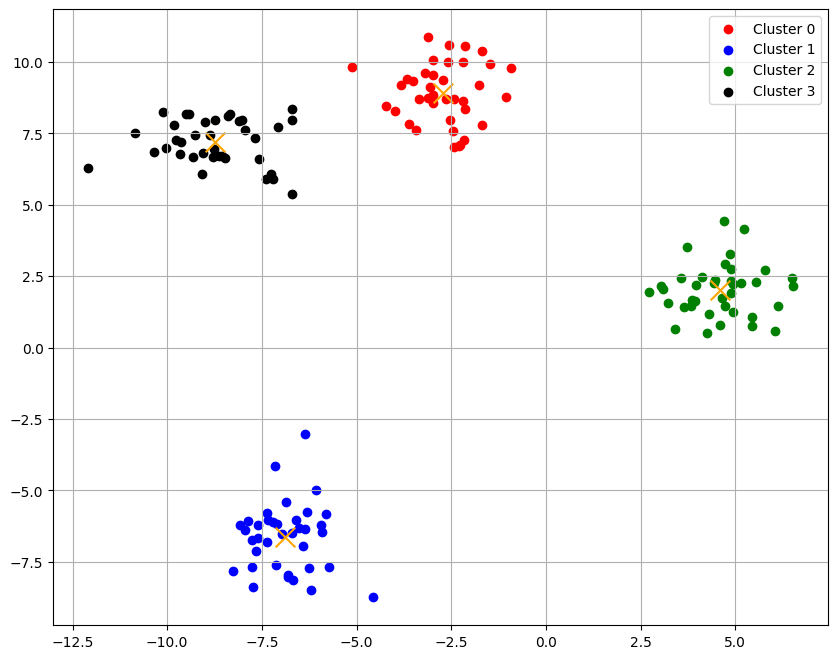

In [ ]:
color = {0:"red", 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize=(10, 8))

for cluster in range(4):
    cluster_sub = points[k_cluster.labels_ == cluster]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color[cluster],
               label=f"Cluster {cluster}")

#중심점 추가
plt.scatter(centers[:, 0], centers[:, 1], color='orange', marker='x', s=200)

plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.datasets import make_circles

circle_points, circle_labels = make_circles(n_samples= 150, factor =0.5,
                                           noise = 0.01)

#n_samples : 생성할 데이터 샘플의 총개수
#factor : 원안의 원과 원 바깥의 원의 크기 비율, 값이 작을 수록 안쪽원이 작아짐
#       값이 커질수록 안쪽의 원이 커진다
#noise : 값이 0에 가까울 수록 노이즈 적고 값이 노이즈가 많음

plt.figure(figsize = (10, 6))

#모델 생성
circle_kmeans = KMeans(n_clusters = 2)
circle_kmeans

KMeans(n_clusters=2)

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 모델학습
circle_kmeans.fit(circle_points)

KMeans(n_clusters=2)

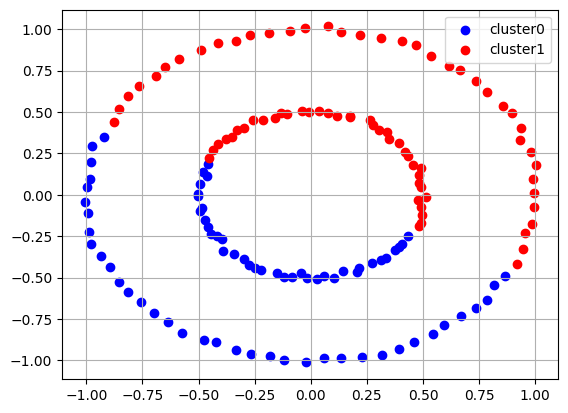

In [ ]:
color = {0:"blue", 1:'red'}
for i in range(2):
    cluster_sub = circle_points[circle_kmeans.labels_ == i]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1],
                c = color[i], label = f"cluster{i}")

plt.grid()
plt.legend()
plt.show()

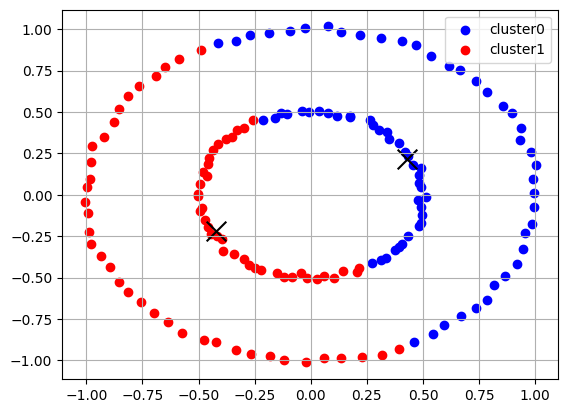

In [ ]:
#모델 학습
circle_kmeans.fit(circle_points)

color = {0:"blue", 1:'red'}
for i in range(2):
    cluster_sub = circle_points[circle_kmeans.labels_ == i]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1],
                c = color[i], label = f"cluster{i}")

#중심점 표시
centers = circle_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=200)

plt.grid()
plt.legend()
plt.show()
